<a href="https://colab.research.google.com/github/katie0carlson/Phys_Lab4_Repo/blob/main/Double_Slit_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
drive.mount('/content/drive')
!pip install --upgrade gspread google-auth
import gspread
from google.auth import default
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
creds, _ = default()
gc = gspread.authorize(creds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sheet = gc.open('Lab1:Double_Slit').sheet1
#Get all values in the sheet
data = sheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(data)
df.columns = df.iloc[0]  #Set first row as column names
df = df.iloc[1:]  #Remove the first row of data

###Isolate Columns by name
#Get the first row (column headers)
column_headers = sheet.row_values(1)
micrometer = column_headers.index('Micrometer: (mm)') + 1  #Adding 1 because sheet columns are 1-indexed
voltage = column_headers.index('Voltage Reading:  (VDC) ') + 1
#Get all values from the column of interest, skipping the first row (header)
micrometer_values = sheet.col_values(micrometer)[1:] #Skip header
voltage_values = sheet.col_values(voltage)[1:]
micrometer = []
voltage = []
for value in micrometer_values:
    try:
        #Convert the value to float and append to the list
        micrometer.append(float(value))
    except ValueError:
        #no NaNs hereee
        pass
for value in voltage_values:
    try:
        voltage.append(float(value))
    except ValueError:
        pass
mm_array = np.array(micrometer)
voltage_array = np.array(voltage)
###Plot the Data
plt.plot(mm_array,voltage_array,'b.-')
plt.title('Voltage v. Micrometer Reading')
plt.xlabel('Micrometer Reading (mm)')
plt.ylabel('Voltage (V)')
plt.show();

ValueError: 'Micrometer: (mm)' is not in list

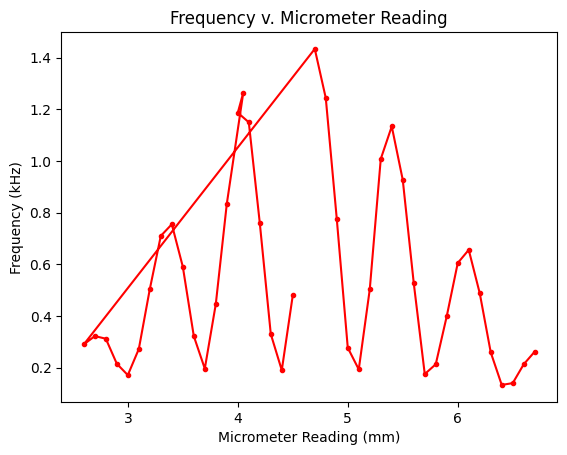

In [ ]:
sheet = gc.open('Lab1:Double_Slit').sheet1
#Get all values in the sheet
data = sheet.get_all_values()
#Convert to a DataFrame
df = pd.DataFrame(data)
df.columns = df.iloc[0]  #Set first row as column names
df = df.iloc[1:]  #Remove the first row of data

###Isolate Columns by name
#Get the first row (column headers)
column_headers = sheet.row_values(1)
micrometer = column_headers.index('Micrometer (mm)') + 1  #Adding 1 because sheet columns are 1-indexed
kHz = column_headers.index('kHz') + 1
#Get all values from the column of interest, skipping the first row (header)
micrometer_values = sheet.col_values(micrometer)[1:] #Skip header
kHz_values = sheet.col_values(kHz)[1:]
micrometer = []
kHz = []
for value in micrometer_values:
    try:
        #Convert the value to float and append to the list
        micrometer.append(float(value))
    except ValueError:
        #no NaNs hereee
        pass
for value in kHz_values:
    try:
        kHz.append(float(value))
    except ValueError:
        pass
mm_array = np.array(micrometer)
kHz_array = np.array(kHz)
###Plot the Data
plt.plot(mm_array,kHz_array,'r.-')
plt.title('Frequency v. Micrometer Reading')
plt.xlabel('Micrometer Reading (mm)')
plt.ylabel('Frequency (kHz)')
plt.show();